In [513]:
%pip install gurobipy
import numpy as np
import matplotlib.pyplot as plt

In [514]:
rnd = np.random
rnd.seed(51)

In [515]:
n = 5  # number of clients
f = 2  # number of charging stations
num_points = n + f + 1

# Generate random coordinates for xc and yc
xc = np.random.rand(num_points) * 200
yc = np.random.rand(num_points) * 100

# Randomly select f points from the generated points
selected_indices = np.random.choice(num_points, f, replace=False)
selected_xc = xc[selected_indices]
selected_yc = yc[selected_indices]

# Remove the selected points from xc and yc
xc = np.delete(xc, selected_indices)
yc = np.delete(yc, selected_indices)

print(xc)
print(yc)
# Append 7 copies of each selected point after the first n points
for i in range(f):
    for _ in range(1):
        xc = np.append(xc, selected_xc[i])
        yc = np.append(yc, selected_yc[i])

# Now xc and yc contain the modified points


# Now xc and yc contain the shuffled points with 7 copies of the selected points

# print("Charging Stations' xc:", charging_xc)
# print("Charging Stations' yc:", charging_yc)
print("Remaining xc:", xc)
print("Remaining yc:", yc)

[135.1462831    8.94243644  68.66073451 189.86756133  31.53403375
  77.59459248]
[58.99936765 48.77957913 17.4343386  24.98314091 41.02479861  4.7725783 ]
Remaining xc: [135.1462831    8.94243644  68.66073451 189.86756133  31.53403375
  77.59459248 128.8039454   56.84259975]
Remaining yc: [58.99936765 48.77957913 17.4343386  24.98314091 41.02479861  4.7725783
 21.81825612 64.67455442]


8


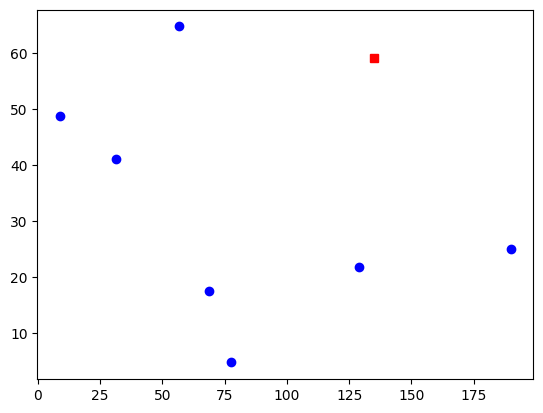

In [516]:
plt.plot(xc[0], yc[0], c='r', marker='s')
plt.scatter(xc[1:], yc[1:], c='b')
print(len(xc))

In [517]:
I = [i for i in range(1, n+1)] #Number of nodes/locations
F = [i for i in range(n+1,n+1+f)]
N = [0] + I + F
F_depo = [0] + F
A = [(i, j) for i in N for j in N if i != j] #every possible combination of i and j
c = {(i, j): np.hypot(xc[i]-xc[j], yc[i]-yc[j]) for i, j in A} #Calculating cost values
C = 15                #Max capacity
q = {i: rnd.randint(1, 10) for i in N} #Alloting random values for demand to be fulfilled
# for _ in range()
Q = 500
H = 50 #Const discharging rate
max_value = max(c.values())
Q = H*1.1*max_value
print(I)
print(F)
print(N)
print(q)
q[0]=0
for i in range(n+1,n+1+f):
    q[i] = 0
print(q)
print(Q)
Q=25000

[1, 2, 3, 4, 5]
[6, 7]
[0, 1, 2, 3, 4, 5, 6, 7]
{0: 6, 1: 3, 2: 4, 3: 8, 4: 8, 5: 4, 6: 9, 7: 3}
{0: 0, 1: 3, 2: 4, 3: 8, 4: 8, 5: 4, 6: 0, 7: 0}
10036.583987911585


In [518]:
print(A)
print(c)

[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (2, 0), (2, 1), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (3, 7), (4, 0), (4, 1), (4, 2), (4, 3), (4, 5), (4, 6), (4, 7), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 6), (5, 7), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 7), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6)]
{(0, 1): 126.61696169598325, (0, 2): 78.40905439489369, (0, 3): 64.43230534598429, (0, 4): 105.15979909926288, (0, 5): 79.07428011512788, (0, 6): 37.71816938803917, (0, 7): 78.50907317949962, (1, 0): 126.61696169598325, (1, 2): 67.44478651417676, (1, 3): 182.48334523475606, (1, 4): 23.885495392311174, (1, 5): 81.54590518033842, (1, 6): 122.8563969420682, (1, 7): 50.468563327354005, (2, 0): 78.40905439489369, (2, 1): 67.44478651417676, (2, 3): 121.44167029679649, (2, 4): 43.987517686689785, (2, 5): 15.496257364303442, (2, 6): 60.30277397931701, (

In [519]:
from gurobipy import Model, GRB, quicksum

mdl = Model('ECVRP')
x = mdl.addVars(A, vtype=GRB.BINARY, name='x')
u = mdl.addVars(N, vtype=GRB.CONTINUOUS, name='u')
# y = mdl.addVars(N, vtype=GRB.CONTINUOUS, name='y')
mdl.modelSense = GRB.MINIMIZE
# u[0].setAttr(GRB.Attr.LB, C)
# u[0].setAttr(GRB.Attr.UB, C)

mdl.setObjective(quicksum(x[i, j]*c[i, j] for i, j in A))
mdl.addConstrs((quicksum(x[i, j] for j in N if i!=j) == 1 for i in I), name='outgoing')
mdl.addConstrs((quicksum(x[i, j] for j in N if i!=j) <= 1 for i in F), name='charging_outgoing')
mdl.addConstrs((quicksum(x[i,j] for j in N if i!=j)-quicksum(x[j,i] for j in N if i!=j) == 0 for i in N), name='blockage')
mdl.addConstrs((u[j]<=u[i]-q[i]*x[i,j] for i in N for j in N if i!=j), name='weight_transfer')
mdl.addConstrs((u[i]>=0 for i in N), name='weight_lower_bound')
mdl.addConstrs((u[i]<=C for i in N), name='weight_upper_bound')
# mdl.addConstr(u[0]==C, name='Specifying_constant_weight')
mdl.Params.MIPGap = 0.2
mdl.Params.TimeLimit = 100  # seconds
mdl.optimize()

Set parameter MIPGap to value 0.2
Set parameter TimeLimit to value 100
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6500U CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 87 rows, 64 columns and 324 nonzeros
Model fingerprint: 0x3d1079a1
Variable types: 8 continuous, 56 integer (56 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+00]
  Objective range  [2e+01, 2e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+01]
Presolve removed 41 rows and 37 columns
Presolve time: 0.00s

Explored 0 nodes (0 simplex iterations) in 0.02 seconds (0.00 work units)
Thread count was 1 (of 4 available processors)

Solution count 0

Model is infeasible
Best objective -, best bound -, gap -


In [520]:
mdl.computeIIS()
mdl.write("mdl.ilp")


Computing Irreducible Inconsistent Subsystem (IIS)...

           Constraints          |            Bounds           |  Runtime
      Min       Max     Guess   |   Min       Max     Guess   |
--------------------------------------------------------------------------
        0        87         -         0         8         -           0s
       15        15        15         0         0         0           0s

IIS computed: 15 constraints, 0 bounds
IIS runtime: 0.05 seconds (0.01 work units)


In [521]:
from gurobipy import Model, GRB, quicksum

model = Model('ECVRP')
x = model.addVars(A, vtype=GRB.BINARY, name='x')
u = model.addVars(N, vtype=GRB.CONTINUOUS,lb=0,ub=C, name='u')
y = model.addVars(N, vtype=GRB.CONTINUOUS,lb=0, ub=Q, name='y')
model.modelSense = GRB.MINIMIZE
# u[0].setAttr(GRB.Attr.LB, C)
# u[0].setAttr(GRB.Attr.UB, C)
# y[0].setAttr(GRB.Attr.LB, Q)
# y[0].setAttr(GRB.Attr.UB, Q)

model.setObjective(quicksum(x[i, j]*c[i, j] for i, j in A))
model.addConstrs((quicksum(x[i, j] for j in N if i!=j) == 1 for i in I), name='outgoing')
model.addConstrs((quicksum(x[i, j] for j in N if i!=j) <= 1 for i in F), name='charging_outgoing')
model.addConstrs((quicksum(x[i,j] for j in N if i!=j)-quicksum(x[j,i] for j in N if i!=j) == 0 for i in N), name='blockage')
model.addConstrs((u[j]<=u[i]-q[i]*x[i,j] + C*(1-x[i,j]) for i in N for j in N if i!=j), name='weight_transfer')
model.addConstrs((u[i]>=0 for i in N), name='weight_lower_bound')
model.addConstrs((u[i]<=C for i in N), name='weight_upper_bound')
model.addConstrs((y[j]<=y[i]-H*c[i,j]*x[i,j]+Q*(1-x[i,j]) for i in I for j in N if i!=j), name = 'charge_left')
model.addConstrs((y[j]<=Q-H*c[i,j]*x[i,j] for i in F_depo for j in N if i!=j), name='after leaving from charging station')
model.addConstrs((y[i]>=0 for i in N), name='charge_lower_bound')
model.addConstrs((y[i]<=Q for i in N), name='charge_upper_bound')
model.addConstr(u[0]==C, name='Specifying_constant_weight')
model.addConstr(y[0]==Q, name='Specifying_constant_charge')
model.Params.MIPGap = 0.2
model.Params.TimeLimit = 100  # seconds
model.optimize()
# optimal path -  active paths
# active_arcs = [a for a in A if x[a].x > 0.99]

# print(active_arcs)
# plt.scatter(xc[1:], yc[1:], c = 'b')
# plt.scatter(xc[0], yc[0], c='r')
# plt.title('Optimal route with %s as max weight'%Q, fontsize = 20)

# number_of_vehicles=0
# for i,j in active_arcs:
#     if(i==0):
#         number_of_vehicles+=1
#     plt.plot([xc[i],xc[j]], [yc[i], yc[j]], c = 'g')
# plt.show()
# print(number_of_vehicles)

Set parameter MIPGap to value 0.2
Set parameter TimeLimit to value 100
Gurobi Optimizer version 10.0.3 build v10.0.3rc0 (win64)

CPU model: Intel(R) Core(TM) i7-6500U CPU @ 2.50GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 161 rows, 72 columns and 510 nonzeros
Model fingerprint: 0x0b680a87
Variable types: 16 continuous, 56 integer (56 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+04]
  Objective range  [2e+01, 2e+02]
  Bounds range     [1e+00, 3e+04]
  RHS range        [1e+00, 3e+04]
Presolve removed 79 rows and 20 columns
Presolve time: 0.01s
Presolved: 82 rows, 52 columns, 435 nonzeros
Variable types: 12 continuous, 40 integer (40 binary)

Root relaxation: objective 2.747411e+02, 30 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     

In [522]:
model.computeIIS()
model.write("model.ilp")


Computing Irreducible Inconsistent Subsystem (IIS)...

           Constraints          |            Bounds           |  Runtime
      Min       Max     Guess   |   Min       Max     Guess   |
--------------------------------------------------------------------------
        0       161         -         0        32         -           0s
       29       106        30         0        30         -           5s
       36        92        53         0        30         -          10s
       45        75        54         0        30         -          15s
       56        57        56         0        22         -          20s
       56        56        56        10        11         -          26s
       56        56        56        10        10        10          26s

IIS computed: 56 constraints, 10 bounds
IIS runtime: 26.11 seconds (2.45 work units)


In [523]:
model.computeIIS()
print("The following constraints are causing the infeasibility:")
for c in model.getConstrs():
    if c.IISConstr:
        print(c.constrName)


IIS computed: 56 constraints, 10 bounds
IIS runtime: 0.00 seconds (0.00 work units)
The following constraints are causing the infeasibility:
outgoing[4]
outgoing[5]
blockage[0]
blockage[1]
blockage[3]
blockage[4]
blockage[5]
blockage[6]
blockage[7]
weight_transfer[1,2]
weight_transfer[1,3]
weight_transfer[1,4]
weight_transfer[1,5]
weight_transfer[1,6]
weight_transfer[1,7]
weight_transfer[2,1]
weight_transfer[2,4]
weight_transfer[2,5]
weight_transfer[2,6]
weight_transfer[2,7]
weight_transfer[3,1]
weight_transfer[3,4]
weight_transfer[3,5]
weight_transfer[3,6]
weight_transfer[3,7]
weight_transfer[4,1]
weight_transfer[4,2]
weight_transfer[4,3]
weight_transfer[4,5]
weight_transfer[4,6]
weight_transfer[4,7]
weight_transfer[5,1]
weight_transfer[5,2]
weight_transfer[5,3]
weight_transfer[5,4]
weight_transfer[5,6]
weight_transfer[5,7]
weight_transfer[6,1]
weight_transfer[6,2]
weight_transfer[6,3]
weight_transfer[6,4]
weight_transfer[6,5]
weight_transfer[6,7]
weight_transfer[7,1]
weight_transfer

In [524]:
for constr in model.getConstrs():
    print(constr.constrName)

outgoing[1]
outgoing[2]
outgoing[3]
outgoing[4]
outgoing[5]
charging_outgoing[6]
charging_outgoing[7]
blockage[0]
blockage[1]
blockage[2]
blockage[3]
blockage[4]
blockage[5]
blockage[6]
blockage[7]
weight_transfer[0,1]
weight_transfer[0,2]
weight_transfer[0,3]
weight_transfer[0,4]
weight_transfer[0,5]
weight_transfer[0,6]
weight_transfer[0,7]
weight_transfer[1,0]
weight_transfer[1,2]
weight_transfer[1,3]
weight_transfer[1,4]
weight_transfer[1,5]
weight_transfer[1,6]
weight_transfer[1,7]
weight_transfer[2,0]
weight_transfer[2,1]
weight_transfer[2,3]
weight_transfer[2,4]
weight_transfer[2,5]
weight_transfer[2,6]
weight_transfer[2,7]
weight_transfer[3,0]
weight_transfer[3,1]
weight_transfer[3,2]
weight_transfer[3,4]
weight_transfer[3,5]
weight_transfer[3,6]
weight_transfer[3,7]
weight_transfer[4,0]
weight_transfer[4,1]
weight_transfer[4,2]
weight_transfer[4,3]
weight_transfer[4,5]
weight_transfer[4,6]
weight_transfer[4,7]
weight_transfer[5,0]
weight_transfer[5,1]
weight_transfer[5,2]
weig